In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [72]:
class kmeansSolution:
    def __init__(self,inp):
        self.inpList=inp
        self.inpDF=pd.DataFrame(index=[i for i in range(0,len(inp))])
        self.inpDF['inputPoints']=inp
    
    def deriveK(self):
        distanceList=[]
        K = range(1,10)
        for k in K:
            km = KMeans(n_clusters=k)
            km = km.fit(self.inpList)
            distanceList.append(km.inertia_)

        plt.plot(K, distanceList, 'ro-')
        plt.xlabel('k')
        plt.ylabel('Distance')
        plt.title('Elbow Method For Optimal k')
        plt.show()
        
    def deriveKmeans(self,k):
        km = KMeans(n_clusters=k)
        km.fit(self.inpList)
        centers = np.array([[round(i,2) for i in x] for x in km.cluster_centers_])
        labels = km.labels_

        label_color_map = { 0 : 'lime'
                           ,1 : 'blue'
                           ,2 : 'black'
                           ,3 : 'cyan'
                           ,4 : 'violet'
                           ,5 : 'cyan'
                           ,6 : 'coral'
                           ,7 : 'pink'
                           ,8 : 'gold'
                           ,9 : 'skyblue'}
        label_color = [label_color_map[l] for l in labels]
        for i in set(labels):
            index = labels == i
            plt.scatter(self.inpDF['inputPoints'].apply(lambda x: x[0]), self.inpDF['inputPoints'].apply(lambda x: x[1]), c=label_color)
            plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
        plt.show()

        self.inpDF['clusterId']=labels
        self.inpDF['centroid']=self.inpDF['clusterId'].apply(lambda x: centers[x])

        return(self.inpDF)        

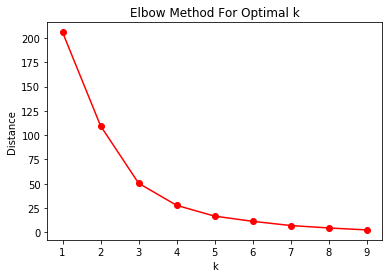

In [73]:
inputList=[(1,2),(2,4),(2,1),(8,9),(6,10),(3,8),(11,5),(3,5),(4,10),(9,4),(5,5),(3,7)]

sol=kmeansSolution(inputList)
sol.deriveK()

### Above diagram indiacates that 4 or 5 as ideal cluster size as the change is not significant after that point. Will use 5 as the cluster size for this dataset. And this has to be changed based on the above diagram for each dataset.

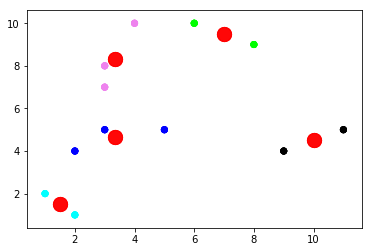

   inputPoints  clusterId      centroid
0       (1, 2)          3    [1.5, 1.5]
1       (2, 4)          1  [3.33, 4.67]
2       (2, 1)          3    [1.5, 1.5]
3       (8, 9)          0    [7.0, 9.5]
4      (6, 10)          0    [7.0, 9.5]
5       (3, 8)          4  [3.33, 8.33]
6      (11, 5)          2   [10.0, 4.5]
7       (3, 5)          1  [3.33, 4.67]
8      (4, 10)          4  [3.33, 8.33]
9       (9, 4)          2   [10.0, 4.5]
10      (5, 5)          1  [3.33, 4.67]
11      (3, 7)          4  [3.33, 8.33]


In [74]:
resDF=sol.deriveKmeans(5)
print(resDF)